### Prime Patterns

<ipython-input-10-cd187385260e>:87: UserWarning: frames=<function frame_generator at 0x78859eccd2d0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, new_animate, frames=frame_generator, init_func=init, blit=False, repeat=False)


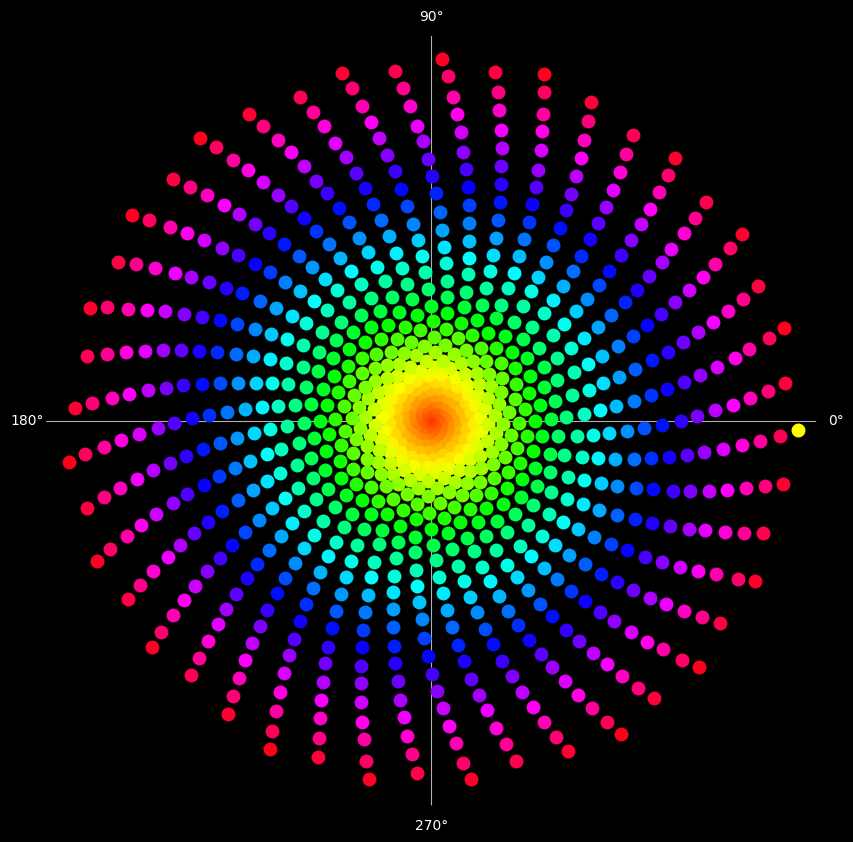

In [10]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

# Global parameters for easy adjustments
num_primes = 1000   # Total number of primes to generate
slow_count = 50     # Number of primes to show slowly
slow_interval = 1000  # Interval for slow animation in milliseconds
fast_interval = 100   # Interval for fast animation in milliseconds
marker_size = 9      # Size of the markers for primes
font_size = 9        # Font size for prime numbers text
blink_color = 'yellow'  # Color for blinking the current prime
normal_color = 'white'  # Normal color for text
font_weight = 'bold'    # Font weight for prime number texts
show_text = True        # Toggle to show or hide text for primes

# Function to check if a number is prime
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

# Generating the first `num_primes` prime numbers
primes = []
n = 2
while len(primes) < num_primes:
    if is_prime(n):
        primes.append(n)
    n += 1

# Preparing the polar plot data
theta = np.arange(len(primes))  # Evenly spaced angle
r = np.array(primes)  # Radius is the prime number itself

# Set up the figure and axis for animation
fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(10, 10), facecolor='black')
ax.set_facecolor('black')  # Set background to black
ax.set_xticks(np.pi/180. * np.array([0, 90, 180, 270]))  # Set angular ticks at the four cardinal directions
ax.set_xticklabels(['0°', '90°', '180°', '270°'], color='white')  # Label the ticks
ax.set_yticks([])  # Remove radial ticks
ax.spines['polar'].set_visible(False)  # Hide the frame

# Colors for each point
colors = plt.cm.hsv(np.linspace(0, 1, len(primes)))

# Store points for updating colors
points = []

# Initialization function: clear the current frame
def init():
    return points

# Animation function: this is called sequentially
def animate(i):
    if points:
        # Change the last point color back to normal
        points[-1][0].set_color(colors[i-1])
    # Plot the current prime number with blink color
    point = ax.plot(theta[i], r[i], 'o', markersize=marker_size, color=blink_color)
    points.append(point)
    # Adding prime number inside the marker
    if i < slow_count and show_text:  # Show text for the first `slow_count` primes if show_text is True
        ax.text(theta[i], r[i], f'{primes[i]}', color=normal_color, fontsize=font_size, ha='center', va='center', fontweight=font_weight, clip_on=True)
    return points

# Custom frame generator to control frame timing
def frame_generator():
    for i in range(len(primes)):
        interval = slow_interval if i < slow_count else fast_interval
        yield i, interval

# Using the generator to control animation timing
def new_animate(data):
    i, interval = data
    animate(i)
    return ani.event_source.interval != interval, interval

ani = animation.FuncAnimation(fig, new_animate, frames=frame_generator, init_func=init, blit=False, repeat=False)

ani.save('prime_patterns.mp4', writer='ffmpeg', fps=30)

plt.show()
